# How can we control the increasing number of accidents in New York?

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64

In [2]:
import calendar

## Introduction

**Business Context.** The city of New York has seen a rise in the number of accidents on the roads in the city. They would like to know if the number of accidents have increased in the last few weeks. For all the reported accidents, they have collected details for each accident and have been maintaining records for the past year and a half (from January 2018 to August 2019). 

The city has contracted you to build visualizations that would help them identify patterns in accidents, which would help them take preventive actions to reduce the number of accidents in the future. They have certain parameters like borough, time of day, reason for accident, etc. Which they care about and which they would like to get specific information on.

**Business Problem.** Your task is to format the given data and provide visualizations that would answer the specific questions the client has, which are mentioned below.

**Analytical Context.** You are given a CSV file (stored in the already created ```data``` folder) containing details about each accident like date, time, location of the accident, reason for the accident, types of vehicles involved, injury and death count, etc. The delimiter in the given CSV file is `;` instead of the default `,`. You will be performing the following tasks on the data:

1. Extract additional borough data stored in a JSON file
2. Read, transform, and prepare data for visualization
3. Perform analytics and construct visualizations of the data to identify patterns in the dataset
        
The client has a specific set of questions they would like to get answers to. You will need to provide visualizations to accompany these:

1. How have the number of accidents fluctuated over the past year and a half? Have they increased over the time?
2. For any particular day, during which hours are accidents most likely to occur?
3. Are there more accidents on weekdays than weekends?
4. What are the accidents count-to-area ratio per borough? Which boroughs have disproportionately large numbers of accidents for their size?
5. For each borough, during which hours are accidents most likely to occur?
6. What are the top 5 causes of accidents in the city? 
7. What types of vehicles are most involved in accidents per borough?
8. What types of vehicles are most involved in deaths?

**Note:** To solve this extended case, please read the function docstrings **very carefully**. They contain information that you will need! Also, please don't include `print()` statements inside your functions (they will most likely produce an error in the test cells).

## Fetching the relevant data

The client has requested analysis of the accidents-to-area ratio for boroughs. Borough data is stored in a JSON file in the ```data``` folder (this file was created using data from [Wikipedia](https://en.wikipedia.org/wiki/Boroughs_of_New_York_City)).

### Question

Use the function ```json.load()``` to load the file ```borough_data.json``` as a dictionary.

**Answer.** One possible solution is given below:

In [3]:
with open('data/borough_data.json') as f:
    borough_data=json.load(f)
borough_data

{'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island',
  'population': 479458.0,
  'area': 58.37}}

### Question

Similarly, use the `pandas` function ```read_csv()``` to load the file ```accidents.csv``` as a DataFrame. Name this DataFrame ```df```. 

**Answer.** One possible solution is given below:

In [4]:
with open('data/accidents.csv') as f:
    df=pd.read_csv(f, delimiter=';')

## Overview of the data

Let's go through the columns present in the DataFrame:

In [5]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

We have the following columns:

1. **BOROUGH**: The borough in which the accident occurred
2. **COLLISION_ID**: A unique identifier for this collision
3. **CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)**: Reasons for the accident
4. **CROSS STREET NAME**: Nearest cross street to the location of the accident
5. **DATE**: Date of the accident
6. **TIME**: Time of the accident
7. **LATITUDE**: Latitude of the accident
8. **LONGITUDE**: Longitude of the accident
9. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED**: Injuries by category
10. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED**: Deaths by category
11. **ON STREET NAME**: Street where the accident occurred
13. **VEHICLE TYPE CODE (1, 2, 3, 4, 5)**: Types of vehicles involved in the accident
14. **ZIP CODE**: Zip code of the accident location

### Exercise 1

Since 2014, New York City has been implementing a road safety plan named [Vision Zero](https://www1.nyc.gov/content/visionzero/pages/). It aims to reduce the number of traffic deaths to *zero* by the end of 2024. The plan is creating new and enhancing current safety measures, some of these include:

<ul>
A. Automated pedestrian detection<br>
B. Road safety audits at high risk locations<br>
C. Expansion in the cycle track network<br>
D. Targeted education and awareness initiatives<br>
E. Creation of pedestrian refuge islands<br>
F. Launch Integrated Data-Driven Speed Reducer Program (speed humps & speed cushions)<br>
</ul>

Which of these initiatives could directly benefit from an analysis of the data provided?

**Note:** In this notebook, whenever you are asked to write text, use the cell below the question cell to write your answer there. If you write in the same cell as the question, your answer will not be recorded.


**Your answer here**.

All of these initiatives could directly benefit from knowledge about where traffic injuries and deaths are most likely to occur, and in particular understanding where traffic injuries & deaths occur among cyclist and pedestrian victims.

## Answering the client's questions

Let's go ahead and answer each of the client's questions.

### Exercise 2

#### 2.1

Group the available accident data by month.

**Hint**: You may find the `pandas` functions [```pd.to_datetime()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) and [```dt.to_period()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.to_period.html) useful.

In [6]:
# Quickly explore data
# df.info()

# Combine and convert DATE and TIME column into pandas timestamp
df["timestamp"] = pd.to_datetime(df["DATE"] + ' ' + df["TIME"])

# Convert date_clean into monthly periods
df["month"] = df["timestamp"].dt.to_period('M')

df[["DATE", "TIME", "timestamp", "month"]].head()

,DATE,TIME,timestamp,month
0,09/26/2018,12:12,2018-09-26 12:12:00,2018-09
1,09/25/2018,16:30,2018-09-25 16:30:00,2018-09
2,08/22/2019,19:30,2019-08-22 19:30:00,2019-08
3,09/23/2018,13:10,2018-09-23 13:10:00,2018-09
4,08/20/2019,22:40,2019-08-20 22:40:00,2019-08


In [7]:
def ex_2(df):
    """
    Group accidents by month
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `monthly_accidents`: The grouped Series
    """
    
    # YOUR CODE HERE
    # Pivot over month and count the complete/non-missing DATE variable
    monthly_accidents = df.groupby('month')["DATE"].count()
    
    # Rename the series for interpretability
    monthly_accidents.rename("Number of accidents", inplace=True)
    
    return monthly_accidents

In [8]:
monthly_accidents = ex_2(df)

#### 2.2
##### 2.2.1

Generate a line plot of accidents over time.

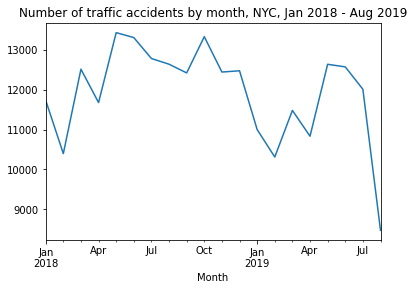

In [9]:
# YOUR CODE HERE
# Set figure and labels
fig = monthly_accidents.plot()
fig.set_title('Number of traffic accidents by month, NYC, Jan 2018 - Aug 2019')
fig.set_xlabel('Month')

# Show plot
plt.show()

##### 2.2.2

Has the number of accidents increased over the past year and a half?


**Your answer here**.

Visually there isn't evidence of the number of accidents increasing over time. It seems plausible that there could be an opposite trend, in fact; that there will be fewer accidents in 2019 than in 2018.

### Exercise 3

From the plot above, which months seem to have the least number of accidents? What do you think are the reasons behind this?


**Your answer here**.

Winter months, December - April, appear to have the least number of accidents. Some reasons for this could include fewer cars on the road due to less tourism and activity in general to New York during cold weather, as well as people who work in New York taking more vacation time over holidays. Additionally, fewer pedestrians and cyclists may be on the streets in New York due to cold weather not ideal for those activities. Additionally, the days are shorter - there is less time during winter months where people are out in NYC and have the opportunity to be involved in an accident. There might also be lower levels of recreational alcohol use at bars/restaurants in NYC during winter months that might contribute to safer driving, cycling, and pedestrianing during these months.

### Exercise 4

#### 4.1

Create a new column `HOUR` based on the data from the `TIME` column.

**Hint:** You may find the ```dt.hour``` accessor useful.

In [10]:
def ex_4(df):
    """
    Group accidents by hour of day
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `hourly_accidents`: The grouped Series

    """
    
    # YOUR CODE HERE
    df["HOUR"] = df["timestamp"].dt.hour
    hourly_accidents = df.groupby('HOUR')['DATE'].count()
    
    # Rename the series for interpretability
    hourly_accidents.rename("Number of accidents", inplace=True)
    
    return hourly_accidents

#### 4.2
##### 4.2.1
 
Plot a bar graph of the distribution per hour throughout the day.

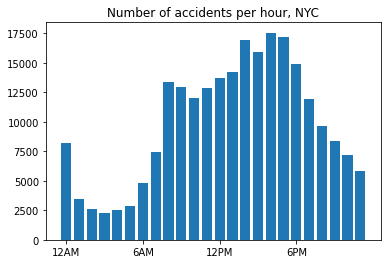

In [11]:
hourly_accidents = ex_4(df)

# YOUR CODE HERE
fig, ax = plt.subplots()
plt.bar(hourly_accidents.index, height=hourly_accidents)
ax.set_xticks([0, 6, 12, 18])
ax.set_xticklabels(['12AM', '6AM', '12PM', '6PM'])
ax.set_title('Number of accidents per hour, NYC')
plt.show()

##### 4.2.2
How does the number of accidents vary throughout a single day?



**Your answer here**.

Accidents peak in the afternoon between 2pm and 6pm, with the number of accidents gradually decreasing as the night progresses. The lowest number of accidents occur during the night and early morning, from 1am to 6am, before accidents begin to gradually increase once more. 

### Exercise 5

In the above question we have aggregated the number accidents per hour disregarding the date and place of occurrence. What criticism would you give to this approach?



**Your answer here**.

There are likely to be significant interactions between hour, day of the week, time of the year, and location. Traffic patterns almost certainly exhibit seasonality; that is, more cars are on the road during summer months vs. winter months, and more cyclists and pedestrians are out during warmer weather. Additionally, traffic patterns on weekends tend to look different than patterns during the work week, due to normal working hours and commutes as well as increased recreational activity on the weekends. Also, depending on all these factors, traffic might be concentrated in different locations. For example, traffic in Midtown and Downtown Manhattan is likely worst during rush hour times, and it would be useful to understand whether that's contributing significantly to the trends seen here, or whether accidents are more likely to occur during rush hour in general.

### Exercise 6


#### 6.1

Calculate the number of accidents by day of the week.

**Hint:** You may find the ```dt.weekday``` accessor useful.

In [12]:
def ex_6(df):
    """
    Group accidents by day of the week
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `weekday_accidents`: The grouped Series
    """
    
    # YOUR CODE HERE
    df["weekday"] = df["timestamp"].dt.weekday
    
    weekday_accidents = df.groupby('weekday')['DATE'].count()
    weekday_accidents.rename("Number of accidents", inplace=True)
    
    return weekday_accidents

#### 6.2
##### 6.2.1
Plot a bar graph based on the accidents count by day of the week.

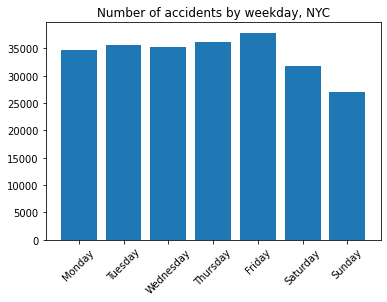

In [13]:
# YOUR CODE HERE
weekday_accidents = ex_6(df)

fig, ax = plt.subplots()
plt.bar(weekday_accidents.index, height=weekday_accidents)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels(calendar.day_name, rotation=45)
ax.set_title('Number of accidents by weekday, NYC')
plt.show()

##### 6.2.2

How does the number of accidents vary throughout a single week?


**Your answer here**.

There is little variation during the work week from Monday through Thursday, and accidents peak on Fridays. There are fewer accidents on the weekend, with the fewest occurences on Sundays.

### Exercise 7

#### 7.1

Calculate the total number of accidents for each borough.

In [14]:
def ex_7_1(df):
    """
    Group accidents by borough
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `boroughs`: The grouped Series
    """
    
    # YOUR CODE HERE
    boroughs = df.groupby('BOROUGH')['DATE'].count()
    boroughs.rename('Number of accidents', inplace=True)
    
    return boroughs

#### 7.2
##### 7.2.1

Plot a bar graph of the previous data.

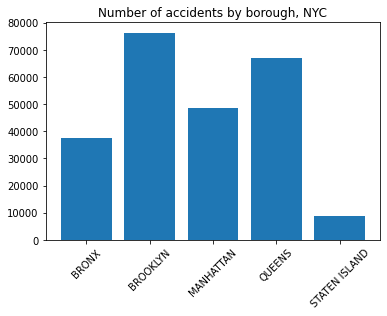

In [15]:
boroughs = ex_7_1(df)
# YOUR CODE HERE
fig, ax = plt.subplots()
ax.bar(boroughs.index, height=boroughs)
plt.xticks(rotation=45)
ax.set_title('Number of accidents by borough, NYC')
plt.show()

##### 7.2.2

What do you notice in the plot?


**Your answer here**.

There is a lot of variation in the number of accidents per borough, and it seems to roughly correspond to the population and area of those boroughs, so this bar graph isn't particularly useful in understanding how accidents might disproportionately affect each borough.

#### 7.3 (hard)

How about per square mile? Calculate the number accidents per square mile for each borough.

**Hint:** You will have to update the keys in the borough dictionary to match the names in the DataFrame.

In [16]:
def ex_7_3(df, borough_data):
    """
    Calculate accidents per sq mile for each borough
    
    Arguments:
    `borough_frame`: A pandas DataFrame with the count of accidents per borough
    `borough_data`: A python dictionary with population and area data for each borough
    
    
    Outputs:
    `borough_frame`: The same `borough_frame` DataFrame used as input, only with an
    additional column called `accidents_per_sq_mi` that results from dividing
    the number of accidents in each borough by its area. Please call this new column
    exactly `accidents_per_sq_mi` - otherwise the test cells will throw an error.
    """
    
    boroughs = ex_7_1(df)
    
    # transpose the data so that name is a column, set it to upper case, and replace THE BRONX with BRONX
    # to align with the boroughs series. Also set index as name for easier merge.
    borough_data = pd.DataFrame(borough_data) # convert dictionary to df
    borough_data_T = borough_data.transpose()
    borough_data_T['name'] = borough_data_T['name'].str.upper()
    borough_data_clean = borough_data_T.replace({'name': {'THE BRONX': 'BRONX'}}).set_index('name')
    
    # merge on indices/name
    borough_frame = borough_data_clean.merge(boroughs, left_index=True, right_index=True)
    borough_frame['accidents_per_sq_mi'] = borough_frame['Number of accidents'] / borough_frame['area']

    
    return borough_frame # This must be a DataFrame, NOT a Series

#### 7.4
##### 7.4.1

Plot a bar graph of the accidents per square mile per borough with the data you just calculated. 

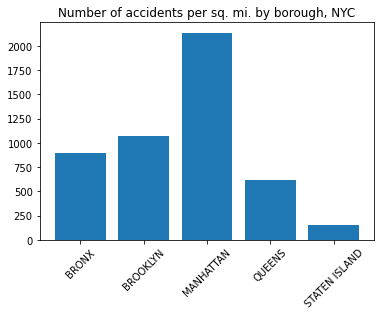

In [17]:
# YOUR CODE HERE
# create variable for accidents per sq mi
borough_df = ex_7_3(df, borough_data)

# plot
fig, ax = plt.subplots()
ax.bar(borough_df.index, height=borough_df['accidents_per_sq_mi'])
plt.xticks(rotation=45)
ax.set_title('Number of accidents per sq. mi. by borough, NYC')
plt.show()

##### 7.4.2

What can you conclude?


**Your answer here**.

Manhattan has by far the highest density of accidents, while Staten Island has the lowest. This roughly corresponds to the borough's population densities.

### Exercise 8

#### 8.1

Create a Series of the number of accidents per hour and borough.

In [18]:
def ex_8_1(df):
    """
    Calculate accidents per hour for each borough
    
    Arguments:
    `df`: A pandas DataFrame
    
    
    Outputs:
    `bor_hour`: A Series. This should be the result of doing groupby by borough
    and hour.
    """
    
    # YOUR CODE HERE
    bor_hour = df.groupby(['BOROUGH', 'HOUR'])['DATE'].count()
    bor_hour.rename('Number of accidents', inplace=True)
    
    return bor_hour

#### 8.2
##### 8.2.1

Plot a bar graph for each borough showing the number of accidents for each hour of the day. 

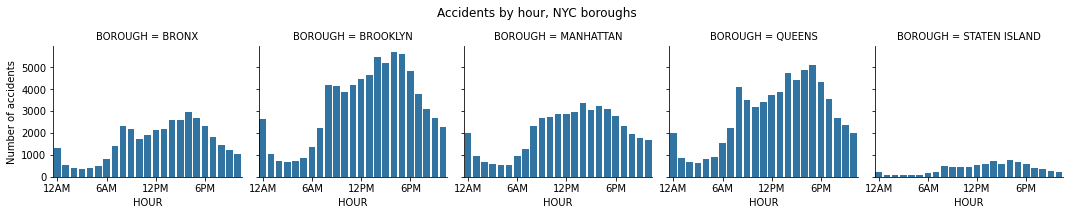

In [19]:
# YOUR CODE HERE
bor_hour = ex_8_1(df)

# Put back into dataframe to use FacetGrid
bor_hour_df = pd.DataFrame(bor_hour).reset_index()

g = sns.FacetGrid(bor_hour_df, col='BOROUGH')
g.map(sns.barplot, 'HOUR', 'Number of accidents', order=range(23))

for ax in g.axes.flatten():
    ax.set_xticks([0, 6, 12, 18])
    ax.set_xticklabels(['12AM', '6AM', '12PM', '6PM'])

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Accidents by hour, NYC boroughs')

plt.show()

##### 8.2.2

Which hours have the most accidents for each borough?

**Hint:** You can use ```sns.FacetGrid``` to create a grid of plots with the hourly data of each borough.


**Your answer here**.

In general, accidents tend to be higher during the late afternoon across all boroughs, with accidents peaking between 4-6pm in the outer boroughs. The outer boroughs also have local peaks in the mornings between 8 and 10am, which likely correspond to rush hour traffic. Compared to the other boroughs, Manhattan has a more unimodal distribution of accidents, with a peak around 2-3pm.

### Exercise 9 (hard)

Using `contrib_df`, find which 6 factors cause the most accidents. It is important that you avoid double counting the contributing factors of a single accident.

**Hint:** You can use the [**`pd.melt()`**](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) function to take a subset of `df` and convert it from [wide format to narrow format](https://en.wikipedia.org/wiki/Wide_and_narrow_data).

In [20]:
def ex_9(df):
    """
    Finds which 6 factors cause the most accidents, without 
    double counting the contributing factors of a single accident.
    
    Arguments:
    `contrib_df`: A pandas DataFrame.
    
    Outputs:
    `factors_most_acc`: A pandas DataFrame. It has only 6 elements, which are,
    sorted in descending order, the contributing factors with the most accidents.
    The column with the actual numbers is named `index`.    
    """
    
    # YOUR CODE HERE
    # Subset only the columns defining contributing factors
    contrib_cols = [col for col in df.columns if 'CONTRIBUTING FACTOR' in col]
    contrib_df = df[contrib_cols]
    
    # melt df into long format
    contrib_df_long = pd.melt(contrib_df, value_vars=contrib_cols, ignore_index=False)
    
    # gather only unique values per accident (based on index level=0) and explode back into rows
    factors = contrib_df_long['value'].groupby(level=0).unique().explode()
    
    # Take only the top 6 factors and output as a dataframe
    factors_most_acc = pd.DataFrame({'index': factors.value_counts().head(6).values}, index=factors.value_counts().head(6).index)
    
    return factors_most_acc

### Exercise 10 (hard)

Which 10 vehicle type-borough pairs are most involved in accidents? Avoid double counting the types of vehicles involved in a single accident. You can apply a similar approach to the one used in the previous exercise using `pd.melt()`.

**Hint:** You may want to include `BOROUGH` as one of your `id_vars` (the other being `index`) in `pd.melt()`. Including `BOROUGH` in your final `.groupby()` is also a good idea.

In [21]:
def ex_10(df):
    """
    Finds the 10 borough:vehicle type pairs with more accidents, without 
    double counting the vehicle types of a single accident.
    
    Arguments:
    `df`: A pandas DataFrame.
    
    Outputs:
    `vehi_most_acc`: A pandas DataFrame. It has only 10 elements, which are,
    sorted in descending order, the borough-vehicle pairs with the most accidents.
    The column with the actual numbers is named `index`
    """
    
    # Frustrating that to get the correct answer you should NOT clean any data!
    
    vehi_cols = ['VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5']
        
    df = df.reset_index()
    
    melted = pd.melt(df, id_vars=['BOROUGH', 'index'], value_vars=vehi_cols)
    
    vehis = melted.groupby(['BOROUGH', 'index'])['value'].unique().explode()
    
    vehi_series = vehis.groupby('BOROUGH').value_counts().sort_values(ascending=False).head(10)
    
    vehi_most_acc = pd.DataFrame({'index': vehi_series.values}, index=vehi_series.index)
    # YOUR CODE HERE
    return vehi_most_acc

### Exercise 11

In a 2018 [interview](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) with The New York Times, New York's mayor de Blasio stated that "*Vision Zero is clearly working*". That year, the number of deaths in traffic accidents in NYC dropped to a historically low 202. Yet, as reported by [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio-1-30707464/), the number of fatalities has increased by 30% in the first quarter of 2019 compared to the previous year and the number of pedestrians and cyclists injured has not seen any improvement.

Which of the following BEST describes how you would use the provided data to understand what went wrong in the first quarter of 2019? Please explain the reasons for your choice.

<ul>
A. Consider the accidents of the first quarter of 2019. Then, check for the most common causes of accidents where pedestrians and cyclists were involved. Give a recommendation based solely on this information.<br>
B. Create a pair of heat maps of the accidents involving injured/killed pedestrians and cyclists in the first quarter of 2018 and 2019. Compare these two to see if there is any change in the concentration of accidents. In critical areas, study the type of factors involved in the accidents. Give a recommendation to visit these areas to study the problem further.<br>
C. The provided data is insufficient to improve our understanding of the situation.<br>
D. None of the above. (If you choose this, please elaborate on what you would do instead.)<br>
</ul>



**Your answer here**.

B.

A geographic heatmap looking at longitude/latitude highlighting areas where accidents involving pedestrians and cyclists took place would help identify areas where there was increased pedestrian/cyclist traffic and accidents involving deaths and injuries. As city dwellers become less reliant on cars and more inclined to walk or cycle, it makes sense that overall vehicular accidents would decrease (less vehicles on the road), but that injuries and fatalities would either increase or stay the same, as accidents involving unprotected pedestrians and cyclists would be more likely to lead to injury/death. Understanding the geography of those accidents would help to focus efforts to create safer bike lanes and pedestrian areas or improve traffic signaling in those areas.

### Exercise 12 (hard)

#### 12.1

Calculate the number of deaths caused by each type of vehicle.

**Hint 1:** As an example of how to compute vehicle involvement in deaths, suppose two people died in an accident where 5 vehicles were involved, and 4 are PASSENGER VEHICLE and 1 is a SPORT UTILITY/STATION WAGON. Then we would add two deaths to both the PASSENGER VEHICLE and SPORT UTILITY/STATION WAGON types.)

**Hint 2:** You will need to use `pd.melt()` and proceed as in the previous exercises to avoid double-counting the types of vehicles (i.e. you should remove duplicate "accident ID - vehicle type" pairs).

In [22]:
def ex_12(df):
    """
    Calculate total killed per vehicle type and plot the result
    as a bar graph
    
    Arguments:
    `df`: A pandas DataFrame.    
    
    Outputs:
    `result`: A pandas DataFrame. Its index should be the vehicle type. Its only
    column should be `TOTAL KILLED`
    """
    
    # YOUR CODE HERE
    # copy df and reset index
    df2 = df.copy()
    df2 = df2.reset_index()
    
    # generate list of columns with kill couns
    killed_cols = [col for col in df.columns if 'KILLED' in col]
    
    # sum killed columns
    df2['TOTAL KILLED'] = df2.apply(lambda row: row[killed_cols].sum(), axis=1)
    
    # list vehicle columns
    vehi_cols = ['VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5']

    melted = pd.melt(df2, id_vars=['index', 'TOTAL KILLED'], value_vars=vehi_cols)

    vehis = melted.groupby(['index', 'TOTAL KILLED'])['value'].unique().explode()
    
    result = pd.DataFrame(vehis.reset_index().groupby('value')['TOTAL KILLED'].sum().sort_values(ascending=False))
        
    return result

#### 12.2
##### 12.2.1

Plot a bar chart for the top 5 vehicles.

In [23]:
# YOUR CODE HERE
result = ex_12(df)

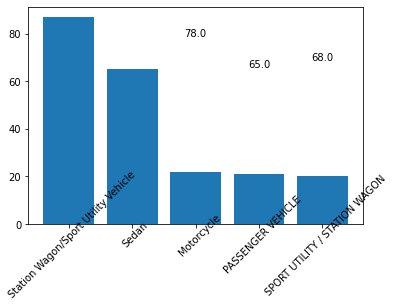

In [24]:
plt.bar(x=result.head().index, height=result.head()['TOTAL KILLED'])
plt.xticks(rotation=45, va='top', wrap=True)
for each in ax.patches:
    height = each.get_height()
    x = each.get_x() + each.get_width() / 2
    plt.annotate(height, (x, height), ha='center', va='bottom')

plt.show()

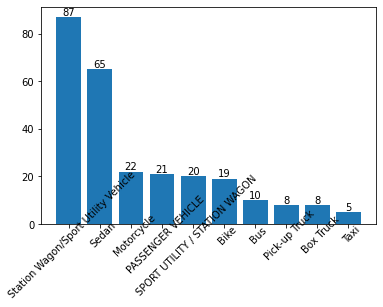

In [25]:
ax = plt.bar(x=result.head(10).index, height=result.head(10)['TOTAL KILLED'])
plt.xticks(rotation=45, va='top', wrap=True)

for each in ax.patches:
    height = each.get_height()
    x = each.get_x() + each.get_width() / 2
    plt.annotate(height, (x, height), ha='center', va='bottom')
    
plt.show()

([<matplotlib.patches.Wedge at 0x12675e0f0>,
 [Text(-0.8450173155565674, 0.704234148852193, 'Station Wagon/Sport Utility Vehicle'),
  Text(-0.7376884665291121, -0.815975322145178, 'Sedan'),
  Text(0.15455263179678522, -1.0890883729085934, 'Motorcycle'),
  Text(0.5972438271988616, -0.923742285961218, 'PASSENGER VEHICLE'),
  Text(0.9176817310743854, -0.6065148311890811, 'SPORT UTILITY / STATION WAGON'),
  Text(1.0799305485268527, -0.2091650313950479, 'Bike'),
  Text(1.0944283205266332, 0.11057418880214934, 'Bus'),
  Text(1.056569926146597, 0.30603919873534957, 'Pick-up Truck'),
  Text(0.9937954822459356, 0.4715618087457555, 'Box Truck'),
  Text(0.92374225450734, 0.5972438758477953, 'Taxi'),
  Text(0.8659018297387264, 0.678390758527212, 'PICK-UP TRUCK'),
  Text(0.8085061995476541, 0.7458670962664924, 'Tractor Truck Diesel'),
  Text(0.753970163667212, 0.8009550501118259, 'BICYCLE'),
  Text(0.7042341216559886, 0.8450173382217778, 'Tanker'),
  Text(0.651928405515265, 0.8859962494741862, 'Dum

/Users/paulsalcuni/.pyenv/versions/3.7.3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/paulsalcuni/.pyenv/versions/3.7.3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0, flags=flags)


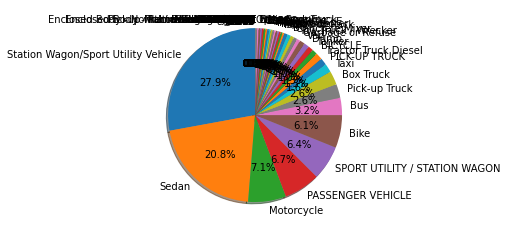

In [26]:
result['TOTAL KILLED'].sum()

plt.pie(x=result['TOTAL KILLED'], labels=result.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
# obviously this is terrible but it's not worth cleaning

##### 12.2.2

Which vehicles are most often involved in deaths, and by how much more than the others?


**Your answer here**.

Station wagons and SUVs are most often involved in deaths (involved in 107 deaths, if you count just the 2 most frequently appearing versions of the text), with sedans second, being involved in 65 accidents resulting in deaths. Of the top 5 vehicle types, station wagon/SUVs and sedans each contribute to deaths more than the next 3 vehicle types combined (motorcycle, passenger vehicle, bike; 22, 21, 19, respectively). Together, station wagons, SUVs and sedans are involved in more than half of the deaths occurring from vehicular accidents in NYC. Whether that is because they are simply

*Note*: Didn't clean the text to combine duplicate vehicle types, etc., as this led to the wrong answers for other exercises.

## Testing cells

In [27]:
# Ex. 2
assert type(ex_2(df)) == type(pd.Series([9,1,2])), "Ex. 2 - Your output isn't a pandas Series. If you use .groupby(), it outputs a Series by default."
assert ex_2(df).loc["2018-10"] == 13336, "Ex. 2 - Wrong output! Try using the .size() aggregation function with your .groupby()."
print("Exercise 2.1 looks correct!")

Exercise 2.1 looks correct!


In [28]:
# Ex 4
assert type(ex_4(df)) == type(pd.Series([9,1,2])), "Ex. 4 - Your output isn't a pandas Series. If you use .groupby(), it outputs a Series by default."
assert ex_4(df).loc[13] == 14224, "Ex. 4 - Wrong output! Try using the .size() aggregation function with your .groupby()."
print("Exercise 4.1 looks correct!")

Exercise 4.1 looks correct!


In [29]:
# Ex. 6
assert type(ex_6(df)) == type(pd.Series([9,1,2])), "Ex. 6 - Your output isn't a pandas Series. If you use .groupby(), it outputs a Series by default."
assert max(ex_6(df)) == 37886, "Ex. 6 - Your results don't match ours! Remember that you can use the .size() aggregation function to count the number of elements in a groupby group."
print("Exercise 6.1 looks correct!")

Exercise 6.1 looks correct!


In [30]:
# Ex. 7.1
assert type(ex_7_1(df)) == type(pd.Series([9,1,2])), "Ex. 7.1 - Your output isn't a pandas Series. If you use .groupby(), it outputs a Series by default."
assert max(ex_7_1(df)) == 76253, "Ex. 7.1 - Your results don't match ours! Remember that you can use the .size() aggregation function to count the number of elements in a groupby group."
print("Exercise 7.1 looks correct!")

Exercise 7.1 looks correct!


In [31]:
# Ex. 7.3
with open('data/borough_data.json') as f:
    borough_data=json.load(f)
borough_data
e73 = ex_7_3(df, borough_data)
assert "accidents_per_sq_mi" in e73.columns, "Ex. 7.3 - You didn't create an 'accidents_per_sq_mi' in your DataFrame!"
assert round(min(e73["accidents_per_sq_mi"])) == 149, "Ex. 7.3 - Your output doesn't match ours! Remember that you need to divide the number of accidents in each of the five boroughs by the respective areas in square miles."
print("Exercise 7.3 looks correct!")

Exercise 7.3 looks correct!


In [32]:
# Ex. 8.1
assert type(ex_8_1(df)) == type(pd.Series([9,1,2])), "Ex. 9 - Your output isn't a pandas Series. If you use .groupby(), it outputs a Series by default."
assert ex_8_1(df).max() == 5701, "Ex. 8.1 - Your numbers don't match ours. If you haven't already, you can try using .size() as your aggregation function."
print("Exercise 8.1 looks correct!")

Exercise 8.1 looks correct!


In [33]:
# Ex. 9
assert type(ex_9(df)) == type(pd.Series([9,1,2]).to_frame()), "Ex. 9 - Your output isn't a pandas DataFrame. If you use .groupby(), it outputs a Series by default."
assert len(ex_9(df)) == 6, "Ex. 9 - Your output doesn't have six elements. Did you forget to use .head(6)?"
assert int(ex_9(df).sum()) == 316248, "Ex. 9 - Your numbers don't match ours. Are you sure you sorted your Series in descending order? If you haven't already, you can try using .count() as your aggregation function."
print("Exercise 9 looks correct!")

Exercise 9 looks correct!


In [34]:
# Ex. 10
assert type(ex_10(df)) == type(pd.Series([9,1,2]).to_frame()), "Ex. 10 - Your output isn't a pandas DataFrame. If you use .groupby(), it outputs a Series by default."
assert len(ex_10(df)["index"]) == 10, "Ex. 10 - Your output doesn't have 10 elements. Did you forget to use .head(10)?"
assert ex_10(df)["index"].sum() == 229882, "Ex. 10 - Your numbers don't match ours. Are you sure you sorted your Series in descending order? If you haven't already, you can try using .count() as your aggregation function."
print("Exercise 10 looks correct!")

Exercise 10 looks correct!


In [35]:
# Ex. 12
e12 = ex_12(df)
assert type(e12) == type(pd.Series([9,1,2]).to_frame()), "Ex. 12 - Your output isn't a pandas DataFrame. If you use .groupby(), it outputs a Series by default."
assert int(e12.loc["Bike"]) == 19, "Ex. 12 - Your output doesn't match ours! Remember that you need to remove the duplicate pairs and use the .sum() aggregation function in your groupby."
print("Exercise 12.1 looks correct!")

Exercise 12.1 looks correct!


## Attribution

"Vehicle Collisions in NYC 2015-Present", New York Police Department, [NYC Open Data terms of use](https://opendata.cityofnewyork.us/overview/#termsofuse), https://www.kaggle.com/nypd/vehicle-collisions

"Boroughs of New York City", Creative Commons Attribution-ShareAlike License, https://en.wikipedia.org/wiki/Boroughs_of_New_York_City